<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Chapter-1---Exploring-Tick,-Volume,-DV-Bars" data-toc-modified-id="Chapter-1---Exploring-Tick,-Volume,-DV-Bars-1" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Chapter 1 - Exploring Tick, Volume, DV Bars</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.1" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Read-and-Clean-Data" data-toc-modified-id="Read-and-Clean-Data-1.2" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Read and Clean Data</a></span></li><li><span><a href="#Remove-Obvious-Price-Errors-in-Tick-Data" data-toc-modified-id="Remove-Obvious-Price-Errors-in-Tick-Data-1.3" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Remove Obvious Price Errors in Tick Data</a></span></li></ul></li><li><span><a href="#Tick-Bars" data-toc-modified-id="Tick-Bars-2" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">2&nbsp;&nbsp;</span>Tick Bars</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Bonus-Exercise:-Make-OHLC-Bars-from-Custom-Bars" data-toc-modified-id="Bonus-Exercise:-Make-OHLC-Bars-from-Custom-Bars-2.0.1" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Bonus Exercise: Make OHLC Bars from Custom Bars</a></span></li></ul></li></ul></li><li><span><a href="#Volume-Bars" data-toc-modified-id="Volume-Bars-3" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">3&nbsp;&nbsp;</span>Volume Bars</a></span></li><li><span><a href="#Dollar-Value-Bars" data-toc-modified-id="Dollar-Value-Bars-4" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">4&nbsp;&nbsp;</span>Dollar Value Bars</a></span></li><li><span><a href="#Analyzing-the-Bars" data-toc-modified-id="Analyzing-the-Bars-5" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">5&nbsp;&nbsp;</span>Analyzing the Bars</a></span><ul class="toc-item"><li><span><a href="#Count-Quantity-of-Bars-By-Each-Bar-Type-(Weekly)" data-toc-modified-id="Count-Quantity-of-Bars-By-Each-Bar-Type-(Weekly)-5.1" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Count Quantity of Bars By Each Bar Type (Weekly)</a></span></li><li><span><a href="#Which-Bar-Type-Has-Most-Stable-Counts?" data-toc-modified-id="Which-Bar-Type-Has-Most-Stable-Counts?-5.2" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Which Bar Type Has Most Stable Counts?</a></span></li><li><span><a href="#Which-Bar-Type-Has-the-Lowest-Serial-Correlation?" data-toc-modified-id="Which-Bar-Type-Has-the-Lowest-Serial-Correlation?-5.3" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Which Bar Type Has the Lowest Serial Correlation?</a></span></li><li><span><a href="#Partition-Bar-Series-into-Monthly,-Compute-Variance-of-Returns,-and-Variance-of-Variance" data-toc-modified-id="Partition-Bar-Series-into-Monthly,-Compute-Variance-of-Returns,-and-Variance-of-Variance-5.4" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Partition Bar Series into Monthly, Compute Variance of Returns, and Variance of Variance</a></span></li><li><span><a href="#Compute-Jarque-Bera-Test,-Which-Has-Lowest-Test-Statistic?" data-toc-modified-id="Compute-Jarque-Bera-Test,-Which-Has-Lowest-Test-Statistic?-5.5" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Compute Jarque-Bera Test, Which Has Lowest Test Statistic?</a></span></li><li><span><a href="#Compute-Shapiro-Wilk-Test" data-toc-modified-id="Compute-Shapiro-Wilk-Test-5.6" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Compute Shapiro-Wilk Test</a></span></li></ul></li><li><span><a href="#Compare-Serial-Correlation-between-Dollar-and-Dollar-Imbalance-Bars" data-toc-modified-id="Compare-Serial-Correlation-between-Dollar-and-Dollar-Imbalance-Bars-6" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">6&nbsp;&nbsp;</span>Compare Serial Correlation between Dollar and Dollar Imbalance Bars</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Update-[05.04.18]" data-toc-modified-id="Update-[05.04.18]-6.0.1" data-vivaldi-spatnav-clickable="1"><span class="toc-item-num">6.0.1&nbsp;&nbsp;</span>Update [05.04.18]</a></span></li></ul></li></ul></li></ul></div>

Advances in Machine Learning

# Chapter 1 - Exploring Tick, Volume, DV Bars

In [1]:
# 경고무시
import warnings
warnings.simplefilter('ignore')

In [78]:
%load_ext watermark
%watermark

%load_ext autoreload
%autoreload 2
# import standard libs
from IPython.display import display
from IPython.core.debugger import set_trace as bp
from pathlib import PurePath, Path
import sys
import time
from collections import OrderedDict as od
import re
import os
import json
os.environ['THEANO_FLAGS'] = 'device=cpu,floatX=float32'

# import python scientific stack
import pandas as pd
import pandas_datareader.data as web
pd.set_option('display.max_rows', 100)
from dask import dataframe as dd
from dask.diagnostics import ProgressBar
pbar = ProgressBar()
pbar.register()
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from numba import jit, njit
import math
import pymc3 as pm
from theano import shared, theano as tt

# import visual tools
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import seaborn as sns

plt.style.use('seaborn-talk')
plt.style.use('bmh')

#plt.rcParams['font.family'] = 'DejaVu Sans Mono'
#plt.rcParams['font.size'] = 9.5
plt.rcParams['font.weight'] = 'medium'
#plt.rcParams['figure.figsize'] = 10,7
blue, green, red, purple, gold, teal = sns.color_palette('colorblind', 6)

# import util libs
import pyarrow as pa
import pyarrow.parquet as pq
from tqdm import tqdm, tqdm_notebook
import warnings
warnings.filterwarnings("ignore")
import missingno as msno


import sys
import os

module_path = os.path.abspath(os.path.join('..'))
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)
    #sys.path.append(module_path+"\\src")


from src.utils.utils import *
from src.features.bars import get_imbalance
import src.features.bars as brs
import src.features.snippets as snp

RANDOM_STATE = 777

print()
%watermark -p pandas,pandas_datareader,dask,numpy,pymc3,theano,sklearn,statsmodels,scipy,matplotlib,seaborn,pyarrow,fastparquet

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
2020-05-06T17:37:41+09:00

CPython 3.7.3
IPython 7.13.0

compiler   : MSC v.1915 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 142 Stepping 10, GenuineIntel
CPU cores  : 8
interpreter: 64bit
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
C:\Dev\Adv_Fin_ML_Exercises\Adv_Fin_ML_Exercises

pandas 1.0.3
pandas_datareader 0.8.1
dask 2.15.0
numpy 1.18.3
pymc3 3.8
theano 1.0.4
sklearn 0.21.3
statsmodels 0.11.0
scipy 1.4.1
matplotlib 3.2.1
seaborn 0.10.0
pyarrow 0.17.0
fastparquet 0.3.3


## Introduction

This notebook explores the idea of sampling prices as a function of something other than fixed time intervals. For example using the number of ticks, volume or dollar volume traded as the sampling interval. The rest of this notebook works through some of the exercises found in chapters 1 and 2 of the book. 

This notebook makes use of the following script found here: `./src/features/bars.py`

## Read and Clean Data

The data set used in this example is too large to be hosted on github. It is a sample of equity tick data, symbol `IVE`, provided by [kibot.com (caution: download link)](http://api.kibot.com/?action=history&symbol=IVE&interval=tickbidask&bp=1&user=guest). Download this data to the `./data/raw/` directory in your local repo.

In [3]:
data_dir = "../data/external/"

In [4]:
def read_kibot_ticks(fp):
    # read tick data from http://www.kibot.com/support.aspx#data_format
    cols = list(map(str.lower,['Date','Time','Price','Bid','Ask','Size']))
    df = (pd.read_csv(fp, header=None)
          .rename(columns=dict(zip(range(len(cols)),cols)))
          .assign(dates=lambda df: (pd.to_datetime(df['date']+df['time'],
                                                  format='%m/%d/%Y%H:%M:%S')))
          .assign(v=lambda df: df['size']) # volume
          .assign(dv=lambda df: df['price']*df['size']) # dollar volume
          .drop(['date','time'],axis=1)
          .set_index('dates')
          .drop_duplicates())
    # 중복이 제거 되어서 문제가 될 수 있음
    # 거래량에 문제 발생 할 수 있음
    
    return df
    
infp = PurePath(data_dir+'/raw/IVE_tickbidask.txt')

df = read_kibot_ticks(infp)
cprint(df)

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                      price     bid     ask   size      v          dv
dates                                                                
2020-04-17 15:59:59  106.05  106.05  106.10    100    100    10605.00
2020-04-17 16:00:00  106.03  106.05  106.10  39005  39005  4135700.15
2020-04-17 16:02:24  106.00  106.00  107.79    149    149    15794.00
2020-04-17 16:10:00  106.03  100.28  107.34      0      0        0.00
2020-04-17 18:30:00  106.03  100.28  107.87      0      0        0.00
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1873281 entries, 2009-09-28 09:30:00 to 2020-04-17 18:30:00
Data columns (total 6 columns):
 #   Column  Dtype  
---  ------  -----  
 0   price   float64
 1   bid     float64
 2   ask     float64
 3   size    int64  
 4   v

Save initial processed data as parquet in the `./data/interim/` folder and reload.

In [5]:
outfp = PurePath(data_dir+'/interim/IVE_tickbidask.parq')
df.to_parquet(outfp)

In [6]:
infp=PurePath(data_dir+'/interim/IVE_tickbidask.parq')
df = pd.read_parquet(infp)
cprint(df)

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                      price     bid     ask   size      v          dv
dates                                                                
2020-04-17 15:59:59  106.05  106.05  106.10    100    100    10605.00
2020-04-17 16:00:00  106.03  106.05  106.10  39005  39005  4135700.15
2020-04-17 16:02:24  106.00  106.00  107.79    149    149    15794.00
2020-04-17 16:10:00  106.03  100.28  107.34      0      0        0.00
2020-04-17 18:30:00  106.03  100.28  107.87      0      0        0.00
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1873281 entries, 2009-09-28 09:30:00 to 2020-04-17 18:30:00
Data columns (total 6 columns):
 #   Column  Dtype  
---  ------  -----  
 0   price   float64
 1   bid     float64
 2   ask     float64
 3   size    int64  
 4   v

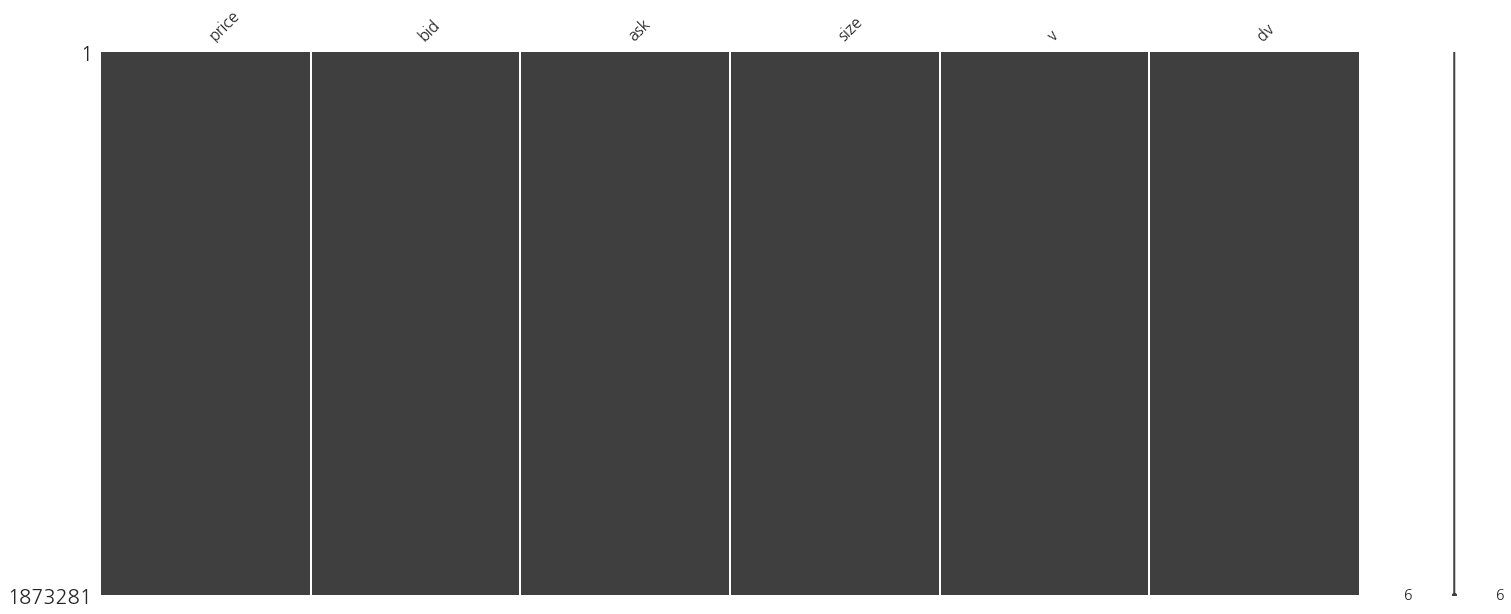

In [7]:
# 누락 데이터 가시화
msno.matrix(df)

## Remove Obvious Price Errors in Tick Data

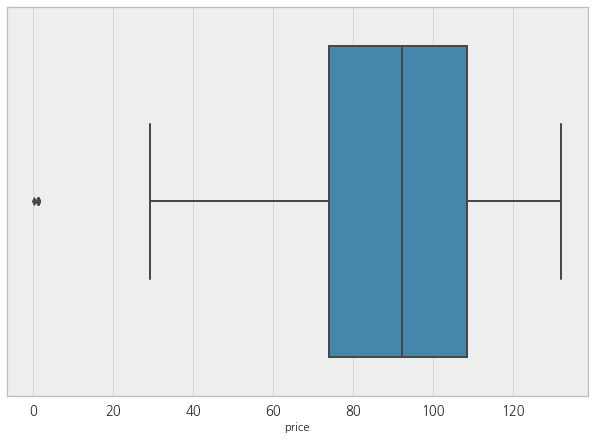

In [8]:
# 아래 그림에서 맨 왼쪽 점으로 표시된 데이터가 이상치(outlier)임
sns.boxplot(df.price)

### 이상치(outlier) 판별
* 이상치 판별시 평균을 사용하지 않고 중앙값을 사용한다.
* 평균의 단점 :계산값이므로 이상치에 크게 좌우된다
* 중앙값 : 중앙값을 취하므로 이상치에 크게 좌우 되지 않는다.
* 따라서 이상치를 판별 할 때 중앙값을 사용한다. 즉 중앙에서 얼마나 벗어나 있는지를 판별한다.
* median absolute deviation (MAD)
    * ${\displaystyle \operatorname {MAD} =\operatorname {median} (|x_{i}-{\hat{x}}|)}$
    * $\hat{x}$ : $x$의 median
* Iglewicz and Hoaglin suggest using ±3.5 as cut-off value but this a matter of choice (±3 is also often used).
    * 1 Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and Handle Outliers", The ASQC Basic References in Quality Control: Statistical Techniques, Edward F. Mykytka, Ph.D., Editor.
    (https://stats.stackexchange.com/questions/123895/mad-formula-for-outlier-detection)
    
$$
M_i=\frac{0.6745(x_i−\hat{x})}{MAD}
$$

In [9]:
# @jit(nopython=True)
def mad_outlier(y, thresh=3.):
    '''
    compute outliers based on mad
    # args
        y: assumed to be array with shape (N,1)
        thresh: float()
    # returns
        array index of outliers
    '''
    median = np.median(y)
    # axis=-1은 axis=1과 동일
    # 분산 = Σ(가격 - 중앙값)^2)
    diff = np.sum((y - median)**2, axis=-1)
    # 표준편차 
    diff = np.sqrt(diff)
    
    # median absolute deviation (MAD)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

* 데이터를 (N,) $\rightarrow$ (N,1) 포맷으로 변경

In [10]:
mad = mad_outlier(df.price.values.reshape(-1,1))

* 이상치(outlier) 데이터 목록

In [11]:
df.loc[mad]

,price,bid,ask,size,v,dv
dates,,,,,,
2010-05-06 14:49:07,0.11,0.10,44.03,500,500,55.0
2010-05-06 14:53:30,1.10,1.10,30.28,2600,2600,2860.0
2010-05-06 14:55:32,1.10,1.10,50.57,300,300,330.0
2010-05-06 14:55:32,1.10,1.10,50.57,100,100,110.0
2010-05-06 14:55:32,1.10,1.00,50.57,200,200,220.0
2010-05-06 14:55:32,1.10,1.00,50.57,700,700,770.0
2010-05-06 14:55:32,1.10,1.00,50.57,1200,1200,1320.0
2010-05-06 14:55:32,1.10,0.55,50.57,500,500,550.0
2010-05-06 14:55:32,1.10,0.55,50.57,100,100,110.0


In [12]:
np.shape(df.loc[mad])

(11, 6)

* 이상치(outlier) 제거 후 거래 데이터 분포
* 아래 boxplot에서 위 boxplot 왼쪽에 보이던 이상치 데이터가 없어진 것을 알 수 있다.

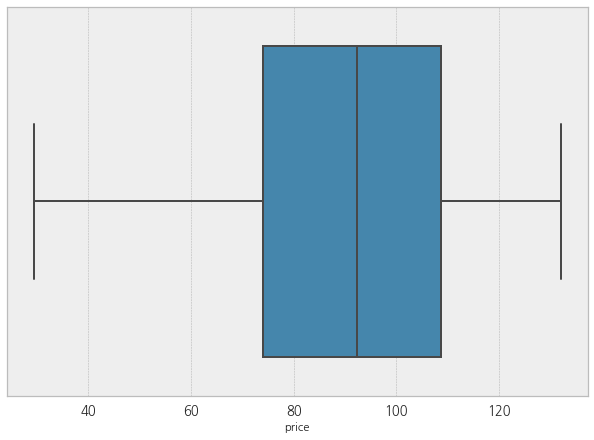

In [13]:
sns.boxplot(df.loc[~mad].price)

Drop outliers from dataset and save cleaned data in the `./data/processed/` folder.
* parquet 포맷으로 파일을 저장한다.

In [14]:
df = df.loc[~mad]
cprint(df)

outfp = PurePath(data_dir+'/processed/clean_IVE_fut_prices.parq')
df.to_parquet(outfp)

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                      price     bid     ask   size      v          dv
dates                                                                
2020-04-17 15:59:59  106.05  106.05  106.10    100    100    10605.00
2020-04-17 16:00:00  106.03  106.05  106.10  39005  39005  4135700.15
2020-04-17 16:02:24  106.00  106.00  107.79    149    149    15794.00
2020-04-17 16:10:00  106.03  100.28  107.34      0      0        0.00
2020-04-17 18:30:00  106.03  100.28  107.87      0      0        0.00
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1873270 entries, 2009-09-28 09:30:00 to 2020-04-17 18:30:00
Data columns (total 6 columns):
 #   Column  Dtype  
---  ------  -----  
 0   price   float64
 1   bid     float64
 2   ask     float64
 3   size    int64  
 4   v

* parquet 포맷으로 저장한 파일을 읽어 온다
* 위의 결과와 저장된 parquet 파일을 읽어온 결과를 비교 해 보면 동일 한것을 알 수 있다.

In [15]:
infp=PurePath(data_dir+'/processed/clean_IVE_fut_prices.parq')
df = pd.read_parquet(infp)
cprint(df)

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                      price     bid     ask   size      v          dv
dates                                                                
2020-04-17 15:59:59  106.05  106.05  106.10    100    100    10605.00
2020-04-17 16:00:00  106.03  106.05  106.10  39005  39005  4135700.15
2020-04-17 16:02:24  106.00  106.00  107.79    149    149    15794.00
2020-04-17 16:10:00  106.03  100.28  107.34      0      0        0.00
2020-04-17 18:30:00  106.03  100.28  107.87      0      0        0.00
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1873270 entries, 2009-09-28 09:30:00 to 2020-04-17 18:30:00
Data columns (total 6 columns):
 #   Column  Dtype  
---  ------  -----  
 0   price   float64
 1   bid     float64
 2   ask     float64
 3   size    int64  
 4   v

# Tick Bars

* tick bar 대상 : price
* tick bar는 틱 데이터에서 m번째 마다 틱 데이터를 추출한다.

In [16]:
# 주어진 데이터 프레임에서 price 컬럼에서 m번째 마다 tick 데이터의 index 목록을 뽑는다.
def tick_bars(df, price_column, m):
    '''
    compute tick bars

    # args
        df: pd.DataFrame()
        column: name for price data
        m: int(), threshold value for ticks
    # returns
        idx: list of indices
    '''
    t = df[price_column]
    ts = 0
    idx = []
    for i, x in enumerate(tqdm(t)):
        ts += 1
        # m번째 마다 데이터 추출
        if ts >= m:
            idx.append(i)
            ts = 0
            continue
    # 추출한 틱데이터 인덱스 목록
    return idx

# 추출된 틱데이터의 index 목록에 해당하는 틱 데이터 프레임를 가져온다.
def tick_bar_df(df, price_column, m):
    # 틱 데이터 표폰 index 목록 추출 
    idx = tick_bars(df, price_column, m)
    # 추출된 표폰 목록에 해당하는 데이터 프레임 반환 (중복이 있는 경우 제거)
    return df.iloc[idx].drop_duplicates()

There are many ways to choose `M`, or the threshold value for sampling prices. One way is based on ratios of total dollar value/volume traded vs number of ticks. The rest of the notebook uses an arbitrary but sensible `M` value. I leave it as an exercise for the reader to see how the results change based on different values of `M`.

`M` 또는 샘플링 가격의 임계 값을 선택하는 방법에는 여러 가지가 있습니다. 한 가지 방법은 거래 된 총 달러 가치 / 볼륨 대 틱 수의 비율을 기반으로합니다. 노트북의 나머지 부분은 임의이지만 합리적인`M` 값을 사용합니다. 독자가 'M'의 다른 값에 따라 결과가 어떻게 변하는지를 이해하기위한 연습으로 남겨둔다.

In [17]:
n_ticks = df.shape[0]
# 틱당 평균 거래량
volume_ratio = (df.v.sum()/n_ticks).round()
# 틱당 평균 달러가치
dollar_ratio = (df.dv.sum()/n_ticks).round()
print(f'num ticks: {n_ticks:,}')
print(f'volume ratio: {volume_ratio}')
print(f'dollar ratio: {dollar_ratio}')

num ticks: 1,873,270
volume ratio: 541.0
dollar ratio: 49087.0


* 틱 샘플링 주기(tick_M 당 1개의 틱을 추출한다)

In [18]:
tick_M = 100 # arbitrary
print(f'tick threshold: {tick_M:,}')
tidx = tick_bars(df, 'price', tick_M)
tidx[:10]

tick threshold: 100


100%|████████████████████████████████████████████████████████████████████| 1873270/1873270 [00:02<00:00, 672743.82it/s]


[99, 199, 299, 399, 499, 599, 699, 799, 899, 999]

In [19]:
df.iloc[tidx].shape, df.shape

((18732, 6), (1873270, 6))

Dataset is large so select smaller example for quick exploration

In [20]:
tick_df = tick_bar_df(df, 'price', tick_M)
tick_df.shape

100%|███████████████████████████████████████████████████████████████████| 1873270/1873270 [00:01<00:00, 1157829.91it/s]


(18732, 6)

In [21]:
tick_df.head()

,price,bid,ask,size,v,dv
dates,,,,,,
2009-09-28 09:53:14,51.1500,51.15,51.18,100,100,5115.00
2009-09-28 10:02:52,51.2500,51.24,51.26,2000,2000,102500.00
2009-09-28 10:22:24,51.1961,51.19,51.20,1100,1100,56315.71
2009-09-28 10:38:44,51.3650,51.36,51.36,100,100,5136.50
2009-09-28 11:24:29,51.3200,51.32,51.33,2000,2000,102640.00


In [22]:
tick_df.tail()

,price,bid,ask,size,v,dv
dates,,,,,,
2020-04-17 14:06:19,104.9450,104.94,104.95,166,166,17420.8700
2020-04-17 14:40:56,104.6000,104.60,104.61,130,130,13598.0000
2020-04-17 15:18:51,105.1800,105.16,105.17,900,900,94662.0000
2020-04-17 15:43:40,105.5701,105.57,105.58,172,172,18158.0572
2020-04-17 15:56:46,106.0250,106.03,106.04,200,200,21205.0000


* 원본과 샘플링한 tick data에서 특정일의 틱 데이터를 가져온다

In [23]:
def select_sample_data(ref, sub, price_col, date):
    '''
    select a sample of data based on date, assumes datetimeindex
    
    # args
        ref: pd.DataFrame containing all ticks
        sub: subordinated pd.DataFrame of prices
        price_col: str(), price column
        date: str(), date to select
    # returns
        xdf: ref pd.Series
        xtdf: subordinated pd.Series
    '''
    xdf = ref[price_col].loc[date]
    xtdf = sub[price_col].loc[date]
    return xdf, xtdf

## try different dates to see how the quantity of tick bars changes
xDate ='2009-10-01' #'2017-10-4'
xdf, xtdf = select_sample_data(df, tick_df, 'price', xDate)

xdf.shape, xtdf.shape

((1466,), (15,))

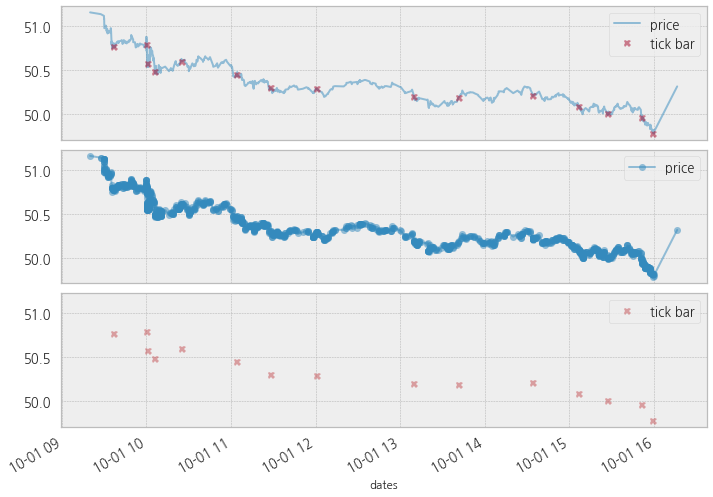

In [24]:
def plot_sample_data(ref, sub, bar_type, *args, **kwds):
    f,axes=plt.subplots(3,sharex=True, sharey=True, figsize=(10,7))
    ref.plot(*args, **kwds, ax=axes[0], label='price')
    sub.plot(*args, **kwds, ax=axes[0], marker='X', ls='', label=bar_type)
    axes[0].legend();
    
    ref.plot(*args, **kwds, ax=axes[1], label='price', marker='o')
    sub.plot(*args, **kwds, ax=axes[2], ls='', marker='X',
             color='r', label=bar_type)

    for ax in axes[1:]: ax.legend()
    plt.tight_layout()
    
    return

plot_sample_data(xdf, xtdf, 'tick bar', alpha=0.5, markersize=7)

### Bonus Exercise: Make OHLC Bars from Custom Bars

Extract `tick_df.price` and `df.price` into two pandas series.

In [25]:
sub = tick_df.price
ref = df.price

The function below creates the OHLC dataframe by:
    1. Iterating over the subordinated series' index extracting idx and idx+1 period
    2. Selecting the same date period from the reference series
    3. Extracting the max, min prices from the reference series.
    4. Combining the o,h,l,c and start and end timestamps into a row
    5. Returning the aggregated rows as a pandas dataframe.

In [26]:
def get_ohlc(ref, sub):
    '''
    fn: get ohlc from custom bars
    
    # args
        ref : reference pandas series with all prices
        sub : custom tick pandas series
    # returns
        tick_df : dataframe with ohlc values
    '''
    ohlc = []
    for i in tqdm(range(sub.index.shape[0]-1)):
        start,end = sub.index[i], sub.index[i+1]
        tmp_ref = ref.loc[start:end]
        max_px, min_px = tmp_ref.max(), tmp_ref.min()
        o,h,l,c = sub.iloc[i], max_px, min_px, sub.iloc[i+1]
        ohlc.append((end,start,o,h,l,c))
    cols = ['end','start','open','high','low','close']
    return (pd.DataFrame(ohlc,columns=cols))

## uncomment below to run (takes about 5-6 mins on my machine)
#tick_bars_ohlc = get_ohlc(ref, sub)
#cprint(tick_bars_ohlc)

#outfp = PurePath(data_dir/'processed'/'tick_bars_ohlc.parq')
#tick_bars_ohlc.to_parquet(outfp)

# Volume Bars

In [27]:
def volume_bars(df, volume_column, m):
    '''
    compute volume bars

    # args
        df: pd.DataFrame()
        volume_column: name for volume data
        m: int(), threshold value for volume
    # returns
        idx: list of indices
    '''
    t = df[volume_column]
    ts = 0
    idx = []
    for i, x in enumerate(tqdm(t)):
        ts += x
        if ts >= m:
            idx.append(i)
            ts = 0
            continue
    return idx

def volume_bar_df(df, volume_column, m):
    idx = volume_bars(df, volume_column, m)
    return df.iloc[idx].drop_duplicates()

In [28]:
volume_M =  10_000 # arbitrary 
print(f'volume threshold: {volume_M:,}')
#v_bar_df = volume_bar_df(df, 'v', 'price', volume_M)
v_bar_df = volume_bar_df(df, 'v',  volume_M)
cprint(v_bar_df)

volume threshold: 10,000


100%|███████████████████████████████████████████████████████████████████| 1873270/1873270 [00:01<00:00, 1304450.46it/s]


-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                      price     bid     ask   size      v          dv
dates                                                                
2020-04-17 15:50:02  106.06  106.07  106.17    100    100    10606.00
2020-04-17 15:54:07  106.19  106.19  106.19    333    333    35361.27
2020-04-17 15:58:46  106.01  105.99  106.00   2900   2900   307429.00
2020-04-17 15:59:40  106.05  106.05  106.06    688    688    72962.40
2020-04-17 16:00:00  106.03  106.05  106.10  39005  39005  4135700.15
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 76741 entries, 2009-09-28 09:44:09 to 2020-04-17 16:00:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   76741 non-null  float64
 1   bid     76741 non-

xdf shape: (1466,), xtdf shape: (48,)


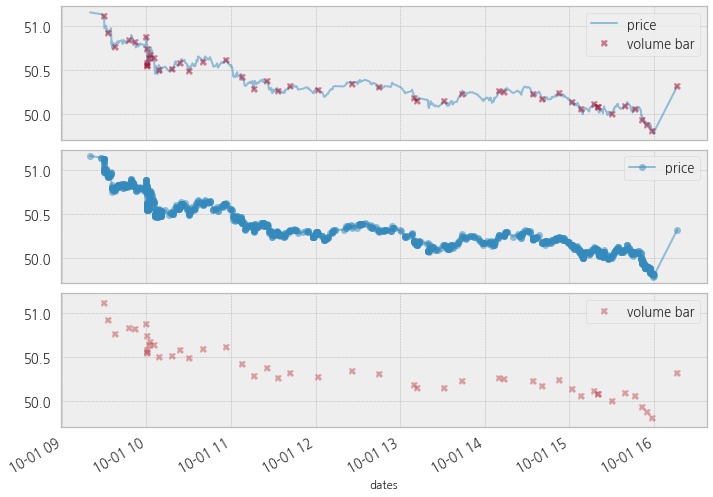

In [29]:
xDate = '2009-10-1'
xdf, xtdf = select_sample_data(df, v_bar_df, 'price', xDate)
print(f'xdf shape: {xdf.shape}, xtdf shape: {xtdf.shape}')

plot_sample_data(xdf, xtdf, 'volume bar', alpha=0.5, markersize=7)  

# Dollar Value Bars

In [30]:
def dollar_bars(df, dv_column, m):
    '''
    compute dollar bars

    # args
        df: pd.DataFrame()
        dv_column: name for dollar volume data
        m: int(), threshold value for dollars
    # returns
        idx: list of indices
    '''
    t = df[dv_column]
    ts = 0
    idx = []
    for i, x in enumerate(tqdm(t)):
        ts += x
        if ts >= m:
            idx.append(i)
            ts = 0
            continue
    return idx

def dollar_bar_df(df, dv_column, m):
    idx = dollar_bars(df, dv_column, m)
    return df.iloc[idx].drop_duplicates()

In [31]:
dollar_M = 1_000_000 # arbitrary 
print(f'dollar threshold: {dollar_M:,}')
#dv_bar_df = dollar_bar_df(df, 'dv', 'price', dollar_M)
dv_bar_df = dollar_bar_df(df, 'dv', dollar_M)
cprint(dv_bar_df)

dollar threshold: 1,000,000


100%|███████████████████████████████████████████████████████████████████| 1873270/1873270 [00:01<00:00, 1276829.55it/s]


-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                        price     bid     ask   size      v            dv
dates                                                                    
2020-04-17 15:53:10  106.1542  106.15  106.18    633    633  6.719561e+04
2020-04-17 15:58:06  105.9600  105.95  105.96    266    266  2.818536e+04
2020-04-17 15:59:01  105.9700  105.97  106.00    390    390  4.132830e+04
2020-04-17 15:59:48  106.0600  106.05  106.06   1600   1600  1.696960e+05
2020-04-17 16:00:00  106.0300  106.05  106.10  39005  39005  4.135700e+06
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 68758 entries, 2009-09-28 09:46:35 to 2020-04-17 16:00:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   68758 non-null  flo

xdf shape: (1466,), xtdf shape: (26,)


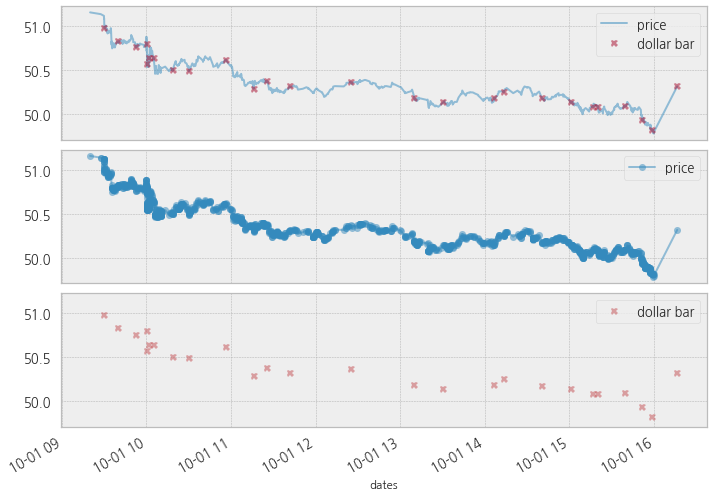

In [32]:
xDate = '2009-10-1'
xdf, xtdf = select_sample_data(df, dv_bar_df, 'price', xDate)
print(f'xdf shape: {xdf.shape}, xtdf shape: {xtdf.shape}')

plot_sample_data(xdf, xtdf, 'dollar bar', alpha=0.5, markersize=7)  

# Analyzing the Bars

## Count Quantity of Bars By Each Bar Type (Weekly)

In [33]:
def count_bars(df, price_col='price'):
    return df.groupby(pd.Grouper(freq='1W'))[price_col].count()

def scale(s):
    return (s-s.min())/(s.max()-s.min())

In [34]:
# count series
# scale to compare 'apples to apples'
tc = scale(count_bars(tick_df))    # 표본 tick bar의 주별 normalized count
vc = scale(count_bars(v_bar_df))   # 표본 volume bar의 주별 normalized count
dc = scale(count_bars(dv_bar_df))  # 표본 dollar bar의 주별 normalized count
dfc = scale(count_bars(df))        # 원본 tick의 주별 normalized count

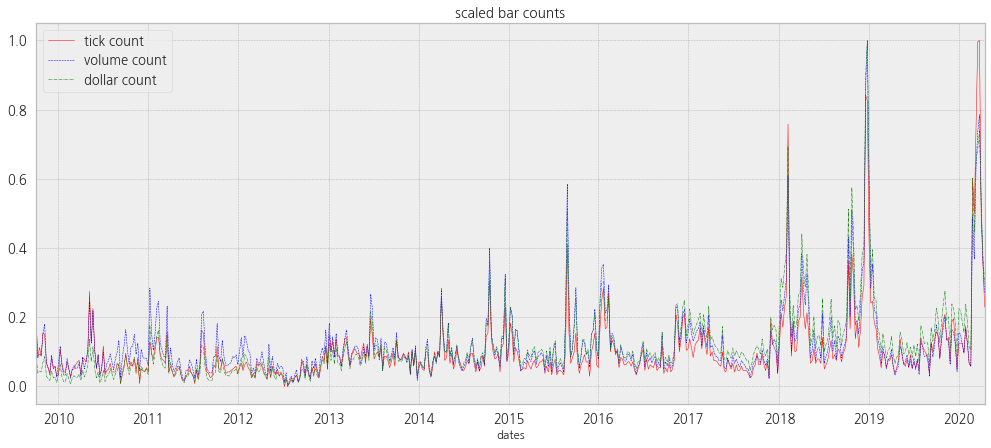

In [35]:
# plot time series of count

f,ax=plt.subplots(figsize=(17,7))

tc.plot(ax=ax, ls='-', label='tick count',linewidth=0.5,color='red')
vc.plot(ax=ax, ls='--', label='volume count',linewidth=0.5, color='blue')
dc.plot(ax=ax, ls='-.', label='dollar count',linewidth=0.5, color='green')

ax.set_title('scaled bar counts')
ax.legend()

## Which Bar Type Has Most Stable Counts?
 * 표준편차(std)가 가장 작은 bar type이 가장 안정적이다.

In [36]:
print(f'tc std: {tc.std():.2%}, vc std: {vc.std():.2%}, dc std: {dc.std():.2%}')

bar_types = ['tick','volume','dollar','df']
bar_std = [tc.std(),vc.std(),dc.std(),dfc.std()]
counts = (pd.Series(bar_std,index=bar_types))
counts.sort_values()

tc std: 10.56%, vc std: 10.58%, dc std: 11.40%


tick      0.105608
volume    0.105841
df        0.105955
dollar    0.114000
dtype: float64

## Which Bar Type Has the Lowest Serial Correlation?
* 가장 낮은 계열상관성을 보이는 bar type은 ?
* 관련 URL : http://blog.naver.com/PostView.nhn?blogId=yonxman&logNo=220960992282
* 회귀모형이 잘 맞으려면 
    * 종속변수와 독립변수 간 선형관계가 존재할 것
    * 독립변수와 오차항(error term)간 상관관계가 없을 것
    * 오차항의 기대값은 0
    * 오차항의 분산은 모든 관찰치에서 일정 할것  $\rightarrow$ 이분산성(Heterosjedasticity)이 없을 것
    * 오차항간의 상관관계가 없을 것 $\rightarrow$ <font color=red>계열 상관성(Serial Correlation)이 없을 것</font>
    * 독립변수간 상관관계가 없을 것 $\rightarrow$ 다중공선성(Multicolinearity)이 없을 것

* 일반수익률이 좌우 비대칭인데 로그 수익률은 좌우 대칭인  정규분포를 더 잘 따르기 때문에 통계적 취급이 용이하다
* $return = s_i/s_{i-1} - 1 , s_i:i \text{번째 tick price}$ 
* np.diff(np.log(s)) :로그수익률 : $r_i = \log(s_i) - \log_{i-1} = \log(s_i/s_{i-1})$


In [37]:
# 로그 수익률
def returns(s):
    arr = np.diff(np.log(s))
    # s.index[1:] : arr은 s 보다 데이터가 하나 더 적다. 따라서 index 를 1나 더 적게 설정
    return (pd.Series(arr, index=s.index[1:]))

* 각 바의 로그 수익률 계산

In [38]:
tr = returns(tick_df.price)
vr = returns(v_bar_df.price)
dr = returns(dv_bar_df.price)
df_ret = returns(df.price)   

bar_returns = [tr, vr, dr, df_ret]

로그 수익률이 좌우 대칭인 정규분포를 잘 따르는 것을 아래에서 확인 할 수 있다.

In [39]:
tr.mean(), tr.std()

(3.891476285105006e-05, 0.0045947856912746995)

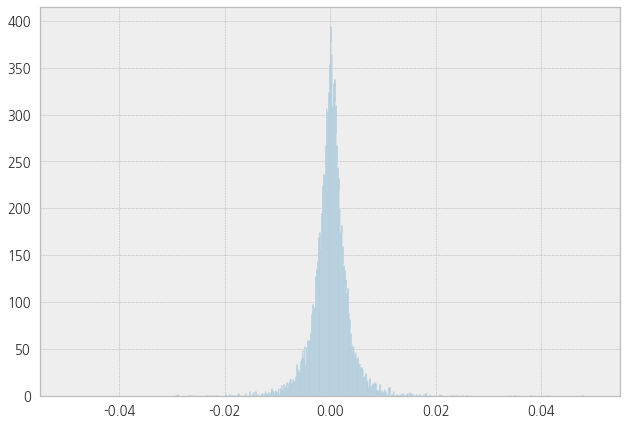

In [40]:
tr.hist(bins=1000,range=[-0.05,0.05])

* 계열상관성은 자기상관(autocorrelation)이라고 하는데 오차항들 끼리 상관성이 존재하는 현상을 의미하며 시계열 자료에 주로 나타남

In [41]:
def get_test_stats(bar_types,bar_returns,test_func,*args,**kwds):
    
    dct = {bar:(int(bar_ret.shape[0]), test_func(bar_ret,*args,**kwds)) 
           for bar,bar_ret in zip(bar_types,bar_returns)}
    df = (pd.DataFrame.from_dict(dct)
          .rename(index={0:'sample_size',1:f'{test_func.__name__}_stat'})
          .T)
    return df

autocorrs = get_test_stats(bar_types,bar_returns,pd.Series.autocorr)
display(autocorrs.sort_values('autocorr_stat'),
        autocorrs.abs().sort_values('autocorr_stat'))

,sample_size,autocorr_stat
df,1873269.0,-0.106657
dollar,68757.0,-0.096958
volume,76740.0,-0.017541
tick,18731.0,0.035049


,sample_size,autocorr_stat
volume,76740.0,0.017541
tick,18731.0,0.035049
dollar,68757.0,0.096958
df,1873269.0,0.106657


In [42]:
def plot_autocorr(bar_types,bar_returns):
    f,axes=plt.subplots(len(bar_types),figsize=(10,7))

    for i, (bar, typ) in enumerate(zip(bar_returns, bar_types)):
        sm.graphics.tsa.plot_acf(bar, lags=120, ax=axes[i],
                                 alpha=0.05, unbiased=True, fft=True,
                                 zero=False,
                                 title=f'{typ} AutoCorr')
    plt.tight_layout()   
    
def plot_hist(bar_types,bar_rets):
    f,axes=plt.subplots(len(bar_types),figsize=(10,6))
    for i, (bar, typ) in enumerate(zip(bar_returns, bar_types)):
        g = sns.distplot(bar, ax=axes[i], kde=False, label=typ)
        g.set(yscale='log')
        axes[i].legend()
    plt.tight_layout()     

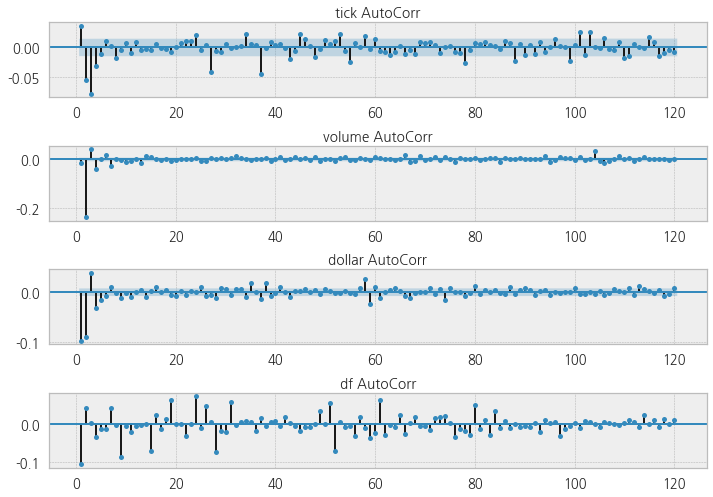

In [43]:
 plot_autocorr(bar_types,bar_returns)

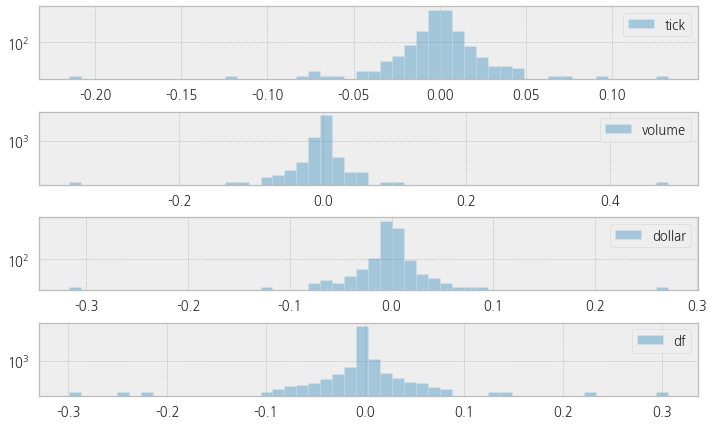

In [44]:
plot_hist(bar_types,bar_returns)

## Partition Bar Series into Monthly, Compute Variance of Returns, and Variance of Variance

In [45]:
def partition_monthly(s):
    return s.resample('1M').var()

In [46]:
tr_rs = partition_monthly(tr)
vr_rs = partition_monthly(vr)
dr_rs = partition_monthly(dr)
df_ret_rs = partition_monthly(df_ret)
monthly_vars = [tr_rs, vr_rs, dr_rs, df_ret_rs]

In [47]:
get_test_stats(bar_types,monthly_vars,np.var).sort_values('var_stat')

,sample_size,var_stat
df,128.0,4.570088e-12
tick,128.0,1.681082e-09
dollar,128.0,1.815075e-09
volume,128.0,2.338797e-09


## Compute Jarque-Bera Test, Which Has Lowest Test Statistic?
* 참조:https://freshrimpsushi.tistory.com/949
* 하르케-베라 테스트(Jarque-Bera Test)
    * 주어진 데이터가 정규분포를 따르는지 체크 한다.
    * 이 테스트는 왜도와 첨도를 이용해서 검정을 한다.
    * 정규분포는 모왜도와 모첨도가 모두 0이며, 표본왜도 $g_1$과 표본첨도 $g_2$ 에 대해 검정통계량 JB는 다음과 같이 구해지고 자유도 2의 카이제곱분포를 따른다.
    $$
    JB:=\frac{ng_1^2}{6} + \frac{ng_2^2}{24} \sim \chi^2(2)
    $$
    * 하르케-베라 테스트는 이상치에 민감한 왜도를 쓰는 만큼  샤피로-월크 테스트와 비교 했을 땐 이상치를 제거했을 때 정규분포임이 드러나는 경우가 더 많다.
    * 카이제곱 분포를 따르려면 데이터가 2,000개 이상이어야 한다.
    * 보통 회귀분석보다는 시계열 분석에서 정규성을 입증하기 위해 쓰인다.
    * 귀무가설<br/>
    데이터 $\{x_i\}_{i=1}^n$가 주어져 있다고 하자.<br/>
    $H_0$ : 데이터 $\{x_i\}_{i=1}^n$는 정규분포를 따른다.<br/>
    $H_1$ : 데이터 $\{x_i\}_{i=1}^n$는 정규분포를 따르지 않는다.
    * 영가설($H_0$)을 따르면 유의수준은 0.05 이상 이어야 한다. 즉 p-value > 0.05
    * JB 값이 클 수록 정규분포와 거리가 멀어 진다.

* stats.jarque_bera의 리턴값은 JB값,p-value
* 아래에서 test=True 인 경우 JB값을 False인경우 p-value를 돌려 준다.
* p-value가 0.05 이하인 경우 정규분포를 따르지 않게 되는 경우로 영가설이 기각 된다.

* tick-bar가 상대적으로 가장작은 값을 갖는다.

In [48]:
def jb(x,test=True): 
    np.random.seed(12345678)
    if test: return stats.jarque_bera(x)[0]
    return stats.jarque_bera(x)[1]

get_test_stats(bar_types,bar_returns,jb,test=True).sort_values('jb_stat')

,sample_size,jb_stat
tick,18731.0,9.747385e+07
dollar,68757.0,4.829780e+10
volume,76740.0,3.274135e+11
df,1873269.0,2.154865e+14


* 정규분포를 따르지 않는다
* p-value < 0.05

In [49]:
get_test_stats(bar_types,bar_returns,jb,test=False).sort_values('jb_stat')

,sample_size,jb_stat
tick,18731.0,0.0
volume,76740.0,0.0
dollar,68757.0,0.0
df,1873269.0,0.0


## Compute Shapiro-Wilk Test

Shapiro-Wilk test statistic > larger is better.

참고 : https://freshrimpsushi.tistory.com/939

In [50]:
def shapiro(x,test=True): 
    np.random.seed(12345678)
    if test: return stats.shapiro(x)[0]
    return stats.shapiro(x)[1]

(get_test_stats(bar_types,bar_returns,shapiro)
 .sort_values('shapiro_stat')[::-1])

,sample_size,shapiro_stat
tick,18731.0,0.669551
dollar,68757.0,0.441233
volume,76740.0,0.330265
df,1873269.0,0.214212


* 정규분포를 따르지 않는다
* p-value < 0.05

In [51]:
(get_test_stats(bar_types,bar_returns,shapiro,test=False)
 .sort_values('shapiro_stat'))

,sample_size,shapiro_stat
tick,18731.0,0.0
volume,76740.0,0.0
dollar,68757.0,0.0
df,1873269.0,0.0


# Compare Serial Correlation between Dollar and Dollar Imbalance Bars

### Update [05.04.18]

Earlier version was missing some additional code. Before we can compare we must compute the Dollar Imbalance Bar. This is my initial implementation of this concept but is experimental and may need some adjustments. 

   1. Compute the sequence ${bt}_{t=1,...,T}$.
   2. Compute the imbalance at time $T$ defined as $\theta_T = \sum_{t=1}^{T}b_tv_t$.
   3. Compute the expected value of $T$ as ewma of previous $T$ values.
   4. Compute the expected value of $\theta_T$ as ewma of $b_tv_t$ values.
   5. for each index:
        - compute $\lvert\theta_t\rvert >= E_0[T] * \lvert2v^+-E_0[v_t]\rvert$
        - if the condition is met capture the quantity of ticks
        - reset tick count
        - continue


In [52]:
df.price.values

array([ 50.79,  50.71,  50.75, ..., 106.  , 106.03, 106.03])

* $\theta_T = \sum_{t=1}^T b_t v_t$
* bt = $b_t$
* vt = $v_t$
* tidx = $b_t v_t$

In [53]:
bt = get_imbalance(df.price.values)
bt

array([-1.,  1.,  1., ..., -1.,  1.,  1.])

In [54]:
# 달러 거래량
vt = df.dv.iloc[1:]
vt

dates
2009-09-28 09:30:00      32352.98
2009-09-28 09:31:32       5075.00
2009-09-28 09:31:33       5075.00
2009-09-28 09:31:50      15225.00
2009-09-28 09:31:51      15225.00
                          ...    
2020-04-17 15:59:59      10605.00
2020-04-17 16:00:00    4135700.15
2020-04-17 16:02:24      15794.00
2020-04-17 16:10:00          0.00
2020-04-17 18:30:00          0.00
Name: dv, Length: 1873269, dtype: float64

In [55]:
tidx = bt*vt
cprint(tidx)

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                             dv
dates                          
2020-04-17 15:59:59   -10605.00
2020-04-17 16:00:00 -4135700.15
2020-04-17 16:02:24   -15794.00
2020-04-17 16:10:00        0.00
2020-04-17 18:30:00        0.00
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1873269 entries, 2009-09-28 09:30:00 to 2020-04-17 18:30:00
Data columns (total 1 columns):
 #   Column  Dtype  
---  ------  -----  
 0   dv      float64
dtypes: float64(1)
memory usage: 28.6 MB
None
-------------------------------------------------------------------------------



### ======= EWMA Test Start =======

In [56]:
tidx.shape,  tidx.shape[0] //1000

((1873269,), 1873)

In [57]:
wndo = tidx.shape[0] //1000
tidx.ewm(span=wndo).mean()

dates
2009-09-28 09:30:00   -32352.980000
2009-09-28 09:31:32   -13628.998548
2009-09-28 09:31:33    -7387.673769
2009-09-28 09:31:50    -1725.447378
2009-09-28 09:31:51     1671.885875
                           ...     
2020-04-17 15:59:59    20038.204188
2020-04-17 16:00:00    15603.051196
2020-04-17 16:02:24    15569.543137
2020-04-17 16:10:00    15552.926762
2020-04-17 18:30:00    15536.328121
Name: dv, Length: 1873269, dtype: float64

In [58]:
tt = pd.Series(range(tidx.shape[0]), index=tidx.index)

In [59]:
tt

dates
2009-09-28 09:30:00          0
2009-09-28 09:31:32          1
2009-09-28 09:31:33          2
2009-09-28 09:31:50          3
2009-09-28 09:31:51          4
                        ...   
2020-04-17 15:59:59    1873264
2020-04-17 16:00:00    1873265
2020-04-17 16:02:24    1873266
2020-04-17 16:10:00    1873267
2020-04-17 18:30:00    1873268
Length: 1873269, dtype: int64

In [60]:
wndo

1873

In [61]:
# tewm = tt.ewm(wndo)
# tewm

In [62]:
tt.ewm(span=wndo).mean()

dates
2009-09-28 09:30:00    0.000000e+00
2009-09-28 09:31:32    5.002670e-01
2009-09-28 09:31:33    1.000712e+00
2009-09-28 09:31:50    1.501335e+00
2009-09-28 09:31:51    2.002136e+00
                           ...     
2020-04-17 15:59:59    1.872328e+06
2020-04-17 16:00:00    1.872329e+06
2020-04-17 16:02:24    1.872330e+06
2020-04-17 16:10:00    1.872331e+06
2020-04-17 18:30:00    1.872332e+06
Length: 1873269, dtype: float64

In [63]:
tt.ewm(span=wndo).mean()[-1]

1872332.0000000102

https://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html
아래는 위의 자료를 참조하여 구현한 것임

In [64]:
def myEWMA(x, winsize, adjust=False):
  # for loop count
  t = len(x) - winsize + 1
  alpha = 2.0 / (1.0 + winsize)
  p_t = np.zeros(t + 1)
  if adjust:
    p = 0.0
    adj = np.zeros(t + 1)
    a = 0.0
    for i in range(t+1):
      p = (x[i] + (1.0-alpha)*p)
      p_t[i] = p
      p = p_t[i]
      a += np.exp(i * np.log(1.0 - alpha))
      p_t[i] /=  a
  else:
    p_t[0] = x[0]
    for i in range(1,t+1):
      p_t[i] = alpha * x[i] + (1. - alpha)*p_t[i-1]

  return p_t

a = np.array([10,20,30,40,50,60,70,80,90,100])
print(myEWMA(a,2,adjust=False))

[10.         16.66666667 25.55555556 35.18518519 45.0617284  55.02057613
 65.00685871 75.00228624 85.00076208 95.00025403]


In [65]:
a = np.array([10,20,30,40,50,60,70,80,90,100])
tt = pd.Series(a)

In [66]:
myEWMA(a,2,adjust=True)

array([10.        , 17.5       , 26.15384615, 35.5       , 45.20661157,
       55.08241758, 65.03202196, 75.01219512, 85.00457271, 95.00169354])

In [67]:
tt.ewm(span=2,adjust=True).mean()

0    10.000000
1    17.500000
2    26.153846
3    35.500000
4    45.206612
5    55.082418
6    65.032022
7    75.012195
8    85.004573
9    95.001694
dtype: float64

In [68]:
tt.ewm(span=2,adjust=False).mean()

0    10.000000
1    16.666667
2    25.555556
3    35.185185
4    45.061728
5    55.020576
6    65.006859
7    75.002286
8    85.000762
9    95.000254
dtype: float64

### ======= EWMA Test End =======

* $\theta_T = \sum_{t=1}^T b_t v_t$
* bt = $b_t$
* vt = $v_t$
* tidx = $b_t v_t$
* E_bs = $\text{EWMA}(tdix)$

In [69]:
# tidx = bt*vt
wndo = tidx.shape[0]//1000
print(f'window size: {wndo:,.2f}')

## Expected value of bs approximated by ewm
E_bs = tidx.ewm(span=wndo).mean() # expected `bs`

## what is E_T??? 
## in this implementation E_T is ewm of index values
E_T = pd.Series(range(tidx.shape[0]), index=tidx.index).ewm(span=wndo).mean()

df0 =(pd.DataFrame().assign(bs=tidx)
      .assign(E_T=E_T).assign(E_bs=E_bs)
      .assign(absMul=lambda df: df.E_T*np.abs(df.E_bs))
      .assign(absTheta=tidx.cumsum().abs()))
cprint(df0)

window size: 1,873.00
-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                             bs        E_T          E_bs        absMul  \
dates                                                                    
2020-04-17 15:59:59   -10605.00  1872328.0  20038.204188  3.751809e+10   
2020-04-17 16:00:00 -4135700.15  1872329.0  15603.051196  2.921405e+10   
2020-04-17 16:02:24   -15794.00  1872330.0  15569.543137  2.915132e+10   
2020-04-17 16:10:00        0.00  1872331.0  15552.926762  2.912023e+10   
2020-04-17 18:30:00        0.00  1872332.0  15536.328121  2.908916e+10   

                         absTheta  
dates                              
2020-04-17 15:59:59  7.196150e+08  
2020-04-17 16:00:00  7.237507e+08  
2020-04-17 16:02:24  7.237665e+08  
2020-04-17 16:10:00  7.237665e+08  
2020-04-17 18:30:00  7.237665e+08  
-------------------------

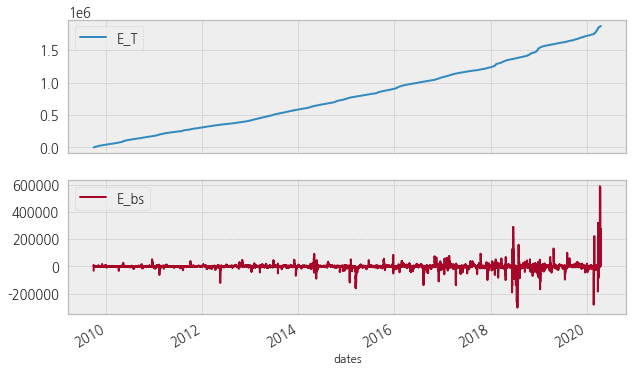

In [70]:
df0[['E_T','E_bs']].plot(subplots=True, figsize=(10,6));

In [71]:
display(df0.describe()/1000)

,bs,E_T,E_bs,absMul,absTheta
count,1873.269000,1873.269000,1873.269000,1.873269e+03,1.873269e+03
mean,-0.386365,935.698770,-0.391990,9.332529e+06,6.514337e+05
std,885.735501,540.764994,20.306788,2.977788e+07,6.514460e+05
min,-261168.200000,0.000000,-302.414290,0.000000e+00,3.537070e-01
25%,-20.039560,467.381000,-3.387525,7.082019e+05,7.027123e+04
50%,-4.982000,935.698000,-0.158788,2.559425e+06,5.158541e+05
75%,19.918465,1404.015000,3.084139,7.604763e+06,1.231387e+06
max,544279.567830,1872.332000,588.026994,1.097118e+09,2.183728e+06


In [72]:
df0.loc['2010-06',['absMul','absTheta']]

,absMul,absTheta
dates,,
2010-06-01 09:30:00,1.559035e+08,3.915600e+07
2010-06-01 09:30:00,1.563352e+08,3.915075e+07
2010-06-01 09:30:00,1.568858e+08,3.914444e+07
2010-06-01 09:30:28,1.579124e+08,3.913393e+07
2010-06-01 09:30:41,1.583413e+08,3.912868e+07
...,...,...
2010-06-30 15:59:57,2.426939e+08,3.254493e+07
2010-06-30 15:59:57,2.464795e+08,3.251265e+07
2010-06-30 15:59:57,2.497947e+08,3.248410e+07


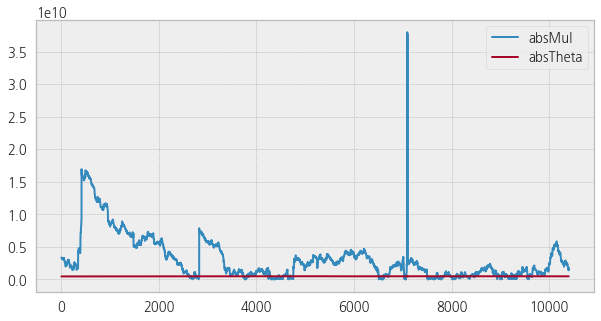

In [73]:
(df0.loc['2015-06',['absMul','absTheta']]
 .reset_index(drop=True)
 .plot(figsize=(10,5)))

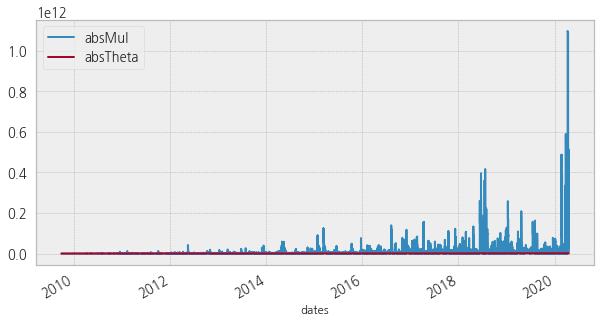

In [74]:
(df0.loc[:,['absMul','absTheta']]
#  .reset_index(drop=True)
 .plot(figsize=(10,5)))

In [75]:
for i in df0.itertuples():
  print(i)
  break

Pandas(Index=Timestamp('2009-09-28 09:30:00'), bs=-32352.98, E_T=0.0, E_bs=-32352.98, absMul=0.0, absTheta=32352.98)


In [81]:
@njit
def test_t_abs(absTheta,t,E_bs):
    """
    Bool function to test inequality
    *row is assumed to come from df.itertuples()
    -absTheta: float(), row.absTheta
    -t: pd.Timestamp()
    -E_bs: float(), row.E_bs
    """
    return (absTheta >= t*E_bs)

def agg_imbalance_bars(df):
    """
    Implements the accumulation logic
    """
    start = df.index[0]  
    bars = []
    for row in df.itertuples():
        t_abs = row.absTheta
        rowIdx = row.Index
        E_bs = row.E_bs
        
        t = df.loc[start:rowIdx].shape[0]
        if t<1: t=1 # if t lt 1 set equal to 1
        #if test_t_abs(t_abs,t,E_bs):
        if test_t_abs(t_abs,t,np.abs(E_bs)):
            bars.append((start,rowIdx,t))
            start = rowIdx
    return bars

In [82]:
bars = agg_imbalance_bars(df0)

In [83]:
test_imb_bars = (pd.DataFrame(bars,columns=['start','stop','Ts'])
                 .drop_duplicates())
cprint(test_imb_bars)

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                      start                stop  Ts
1873185 2020-04-17 15:59:57 2020-04-17 15:59:59   3
1873186 2020-04-17 15:59:59 2020-04-17 16:00:00   2
1873187 2020-04-17 16:00:00 2020-04-17 16:02:24   2
1873188 2020-04-17 16:02:24 2020-04-17 16:10:00   2
1873189 2020-04-17 16:10:00 2020-04-17 18:30:00   2
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1556292 entries, 0 to 1873189
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   start   1556292 non-null  datetime64[ns]
 1   stop    1556292 non-null  datetime64[ns]
 2   Ts      1556292 non-null  int64         
dtypes: datetime64[ns](2), int64(1)
memory usage: 47.5 MB
None
--------------------------------------------------

In [84]:
test_imb_bars.Ts.describe().round()

count    1556292.0
mean           3.0
std            2.0
min            1.0
25%            2.0
50%            2.0
75%            3.0
max          139.0
Name: Ts, dtype: float64

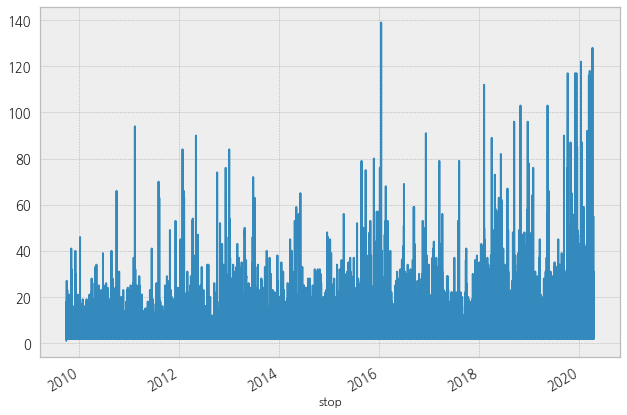

In [85]:
test_imb_bars.set_index('stop')['Ts'].plot()

In [86]:
dvImbBars = df.price.loc[test_imb_bars.stop].drop_duplicates()
cprint(dvImbBars)

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                        price
dates                        
2020-04-17 15:49:10  105.8382
2020-04-17 15:51:35  106.2511
2020-04-17 15:51:51  106.2443
2020-04-17 15:53:10  106.1542
2020-04-17 15:58:14  105.9359
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 330883 entries, 2009-09-28 09:30:00 to 2020-04-17 15:58:14
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   price   330883 non-null  float64
dtypes: float64(1)
memory usage: 5.0 MB
None
-------------------------------------------------------------------------------



In [87]:
dvBar = dv_bar_df.price
cprint(dvBar)

-------------------------------------------------------------------------------
dataframe information
-------------------------------------------------------------------------------
                        price
dates                        
2020-04-17 15:53:10  106.1542
2020-04-17 15:58:06  105.9600
2020-04-17 15:59:01  105.9700
2020-04-17 15:59:48  106.0600
2020-04-17 16:00:00  106.0300
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 68758 entries, 2009-09-28 09:46:35 to 2020-04-17 16:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   68758 non-null  float64
dtypes: float64(1)
memory usage: 3.5 MB
None
-------------------------------------------------------------------------------



In [88]:
dr = returns(dv_bar_df.price)
drImb = returns(dvImbBars)

In [107]:
bar_types = ['dvBar','dvImb']
bar_rets = [dr, drImb]

get_test_stats(bar_types,bar_rets,pd.Series.autocorr)

,sample_size,autocorr_stat
dvBar,68757.0,-0.096958
dvImb,330882.0,-0.069634


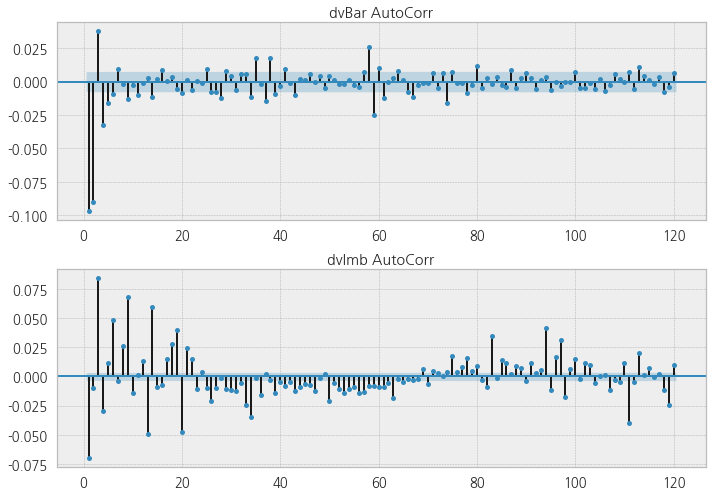

In [108]:
plot_autocorr(bar_types,bar_rets)

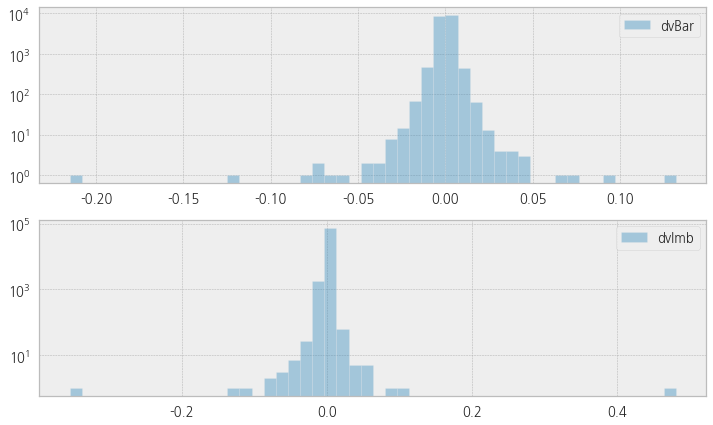

In [109]:
plot_hist(bar_types,bar_rets)

In [110]:
jbs = get_test_stats(bar_types,bar_rets,jb).sort_values('jb_stat')
shaps = (get_test_stats(bar_types,bar_rets,shapiro)
         .sort_values('shapiro_stat')[::-1])

display(jbs,shaps)

,sample_size,jb_stat
dvBar,68757.0,4.829780e+10
dvImb,330882.0,6.523386e+11


,sample_size,shapiro_stat
dvBar,68757.0,0.441233
dvImb,330882.0,0.352562
